In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
output = pd.read_table('output.csv',delimiter =',')
output
output['kdry'][5]

6273197025.020821

In [33]:
output_edit = pd.read_table('output_edit.csv',delimiter =',')
output_edit

,Unnamed: 0,ksat,kmin,kdry,mysat,rsat,kmin_fls
0,0,7.807090e+09,2.524804e+10,6.695603e+09,6.222042e+09,1777.91075,2.625225e+10
1,1,7.876962e+09,2.524804e+10,6.670470e+09,6.198000e+09,1777.91075,2.625225e+10
2,2,7.948477e+09,2.524804e+10,6.643050e+09,6.171854e+09,1777.91075,2.625225e+10
3,3,8.021179e+09,2.524804e+10,6.612796e+09,6.143107e+09,1777.91075,2.625225e+10
4,4,8.094432e+09,2.524804e+10,6.578924e+09,6.111050e+09,1777.91075,2.625225e+10
5,5,8.144094e+09,2.524804e+10,6.553240e+09,6.086832e+09,1777.91075,2.625225e+10
6,6,8.167288e+09,2.524804e+10,6.540239e+09,6.074603e+09,1777.91075,2.625225e+10
7,7,8.238208e+09,2.524804e+10,6.494774e+09,6.031994e+09,1777.91075,2.625225e+10
8,8,8.304361e+09,2.524804e+10,6.438875e+09,5.979944e+09,1777.91075,2.625225e+10


In [3]:
input = pd.read_table('test.csv',delimiter =',')

input




,fluid_pressure,brine_saturation,gas_saturation,porosity,sand_fraction,depth,rock_pressure
0,20000000,0,0,0.25,0.8,3000,20000000
1,25000000,0,0,0.25,0.8,3000,25000000
2,30000000,0,0,0.25,0.8,3000,30000000
3,35000000,0,0,0.25,0.8,3000,35000000
4,40000000,0,0,0.25,0.8,3000,40000000
5,43400000,0,0,0.25,0.8,3000,43400000
6,45000000,0,0,0.25,0.8,3000,45000000
7,50000000,0,0,0.25,0.8,3000,50000000
8,55000000,0,0,0.25,0.8,3000,55000000


In [35]:
Kd_new = output_edit['kdry'][5]*((1+3.72*np.exp(-Peff[5]/4.6))/(1+3.72*np.exp(-Peff/4.6)))
Kd_new

0    6.668514e+09
1    6.667081e+09
2    6.662837e+09
3    6.650285e+09
4    6.613340e+09
5    6.553240e+09
6    6.506165e+09
7    6.207850e+09
8    5.464852e+09
Name: fluid_pressure, dtype: float64

In [21]:
Peff = 68e6 - input['fluid_pressure']
Peff = Peff*10e-7
Peff

0    48.0
1    43.0
2    38.0
3    33.0
4    28.0
5    24.6
6    23.0
7    18.0
8    13.0
Name: fluid_pressure, dtype: float64

In [18]:
output['kdry']

0    6.481409e+09
1    6.444695e+09
2    6.404618e+09
3    6.360374e+09
4    6.310806e+09
5    6.273197e+09
6    6.254152e+09
7    6.187509e+09
8    6.105485e+09
Name: kdry, dtype: float64

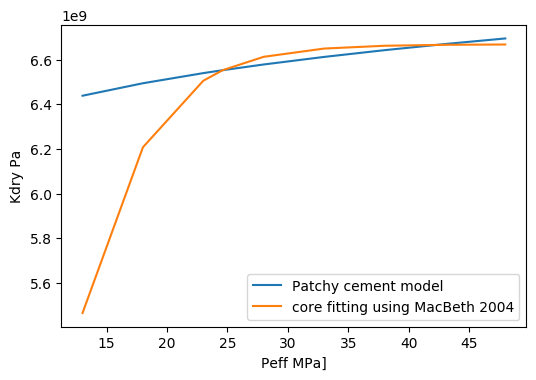

In [38]:
plt.rcParams['figure.dpi'] = 100
plt.plot(Peff,output_edit['kdry'],label='Patchy cement model')
plt.plot(Peff,Kd_new,label = 'core fitting using MacBeth 2004')

plt.xlabel("Peff MPa]")
plt.ylabel("Kdry Pa")
plt.legend()

plt.show()

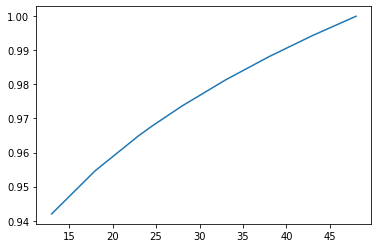

In [42]:
plt.plot(Peff,output['kdry']/np.max(output['kdry']))